In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("sales_data_sample.csv",encoding="latin-1")# specific encoding standard  to correctly interpret the characters in the file

In [1]:
df.head(10)

In [2]:
df.info()

In [ ]:
df2=df.select_dtypes(exclude=["object"])


In [3]:
df2

In [ ]:
df2.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0
MSRP,0


In [ ]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(df2)

In [ ]:
clustering_score=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='random',random_state=42)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)# inertia_ = Sum of squared distances of samples to their closest cluster center.


In [ ]:
clustering_score

[25407.00000000002,
 20090.88701217341,
 16909.35954783244,
 14818.002265126092,
 13538.238505715603,
 12546.487375729283,
 11750.539332728105,
 11071.19057492527,
 10585.095966606828,
 10116.039173310783]

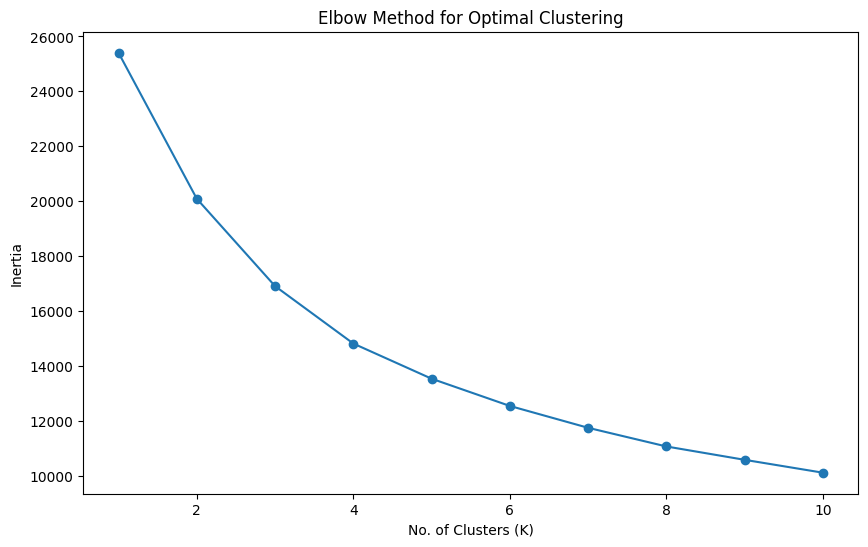

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score,marker="o")
plt.xlabel("No. of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clustering")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)
# Compute cluster centers and predict cluster index for each sample.
pred=kmeans.predict(X)
pred

array([2, 2, 4, ..., 0, 0, 0], dtype=int32)

In [ ]:
df2['Cluster']=pred
print('Number of data points in each cluster= \n',df2['Cluster'].value_counts())

Number of data points in each cluster= 
 Cluster
3    647
2    631
1    575
4    508
0    462
Name: count, dtype: int64


In [ ]:
kmeans.cluster_centers_

In [ ]:
# Group by cluster and calculate the mean of each feature
cluster_summary = df2.groupby('Cluster').mean()
print(cluster_summary)

          ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
Cluster                                                              
0        10391.705628        35.965368  82.886472         6.004329   
1        10244.709565        41.318261  99.663148         6.064348   
2        10184.551506        33.717908  80.263249         6.521395   
3        10314.616692        32.777434  77.697295         6.888717   
4        10174.598425        31.909449  78.055020         6.734252   

               SALES    QTR_ID   MONTH_ID      YEAR_ID        MSRP  
Cluster                                                             
0        3531.444199  1.346320   2.952381  2005.000000   98.103896  
1        6018.679461  3.189565   8.506087  2003.627826  144.535652  
2        2935.305040  1.477021   3.381933  2003.589540   90.009509  
3        2696.890618  3.684699  10.007728  2003.995363   85.765070  
4        2644.281949  3.740157  10.153543  2003.000000   85.830709  


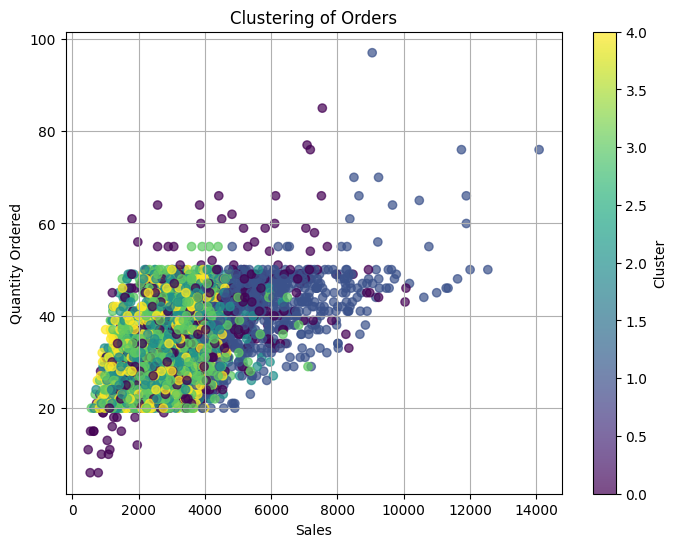

In [ ]:
# Plotting the data with clusters colored differently
plt.figure(figsize=(8, 6))
plt.scatter(df2['SALES'], df2['QUANTITYORDERED'], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.title('Clustering of Orders')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

O(n * K * I )**bold text**
n is the number of data points.
K is the number of clusters.
I is the number of iterations required for convergence
.
WCSS = Σ Σ ||xi - cj||²